In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error

In [ ]:
data = pd.read_csv('../nyc-rolling-sales.csv')

In [6]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [7]:
#Removing columns 
del data['EASE-MENT']
del data['Unnamed: 0']
del data['SALE DATE']

In [8]:
#Checking duplicates
sum(data.duplicated(data.columns))

1358

In [9]:
#Removing duplicates
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [10]:
#Convert some columns to desired datatype
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET']= pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
#data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data['BOROUGH'] = data['BOROUGH'].astype('category')

In [11]:
#checking missing values
data.columns[data.isnull().any()]

Index(['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE'], dtype='object')

In [12]:
miss=data.isnull().sum()/len(data)
miss=miss[miss>0]
miss.sort_values(inplace=True)
miss

SALE PRICE           0.167196
LAND SQUARE FEET     0.312213
GROSS SQUARE FEET    0.327888
dtype: float64

In [13]:
#Convert series to column DataFrame
miss=miss.to_frame()
#Set Column Name
miss.columns=['count']
#Set Index Name
miss.index.names=['Name']
#Create Column from Index
miss['Name']=miss.index
miss

,count,Name
Name,,
SALE PRICE,0.167196,SALE PRICE
LAND SQUARE FEET,0.312213,LAND SQUARE FEET
GROSS SQUARE FEET,0.327888,GROSS SQUARE FEET


<module 'seaborn' from 'C:\\Users\\Munazzam\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

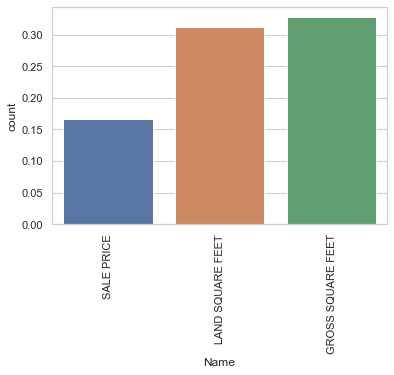

In [14]:
#Plot the missing values
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Name', y='count',data=miss)
plt.xticks(rotation=90)
sns

In [15]:
#Populating mean values for missing data
data['LAND SQUARE FEET']=data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean())
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean())

In [16]:
# Splitting dataset 
test=data[data['SALE PRICE'].isna()]
df=data[data['SALE PRICE'].isna()]

In [17]:
test = test.drop(columns='SALE PRICE')

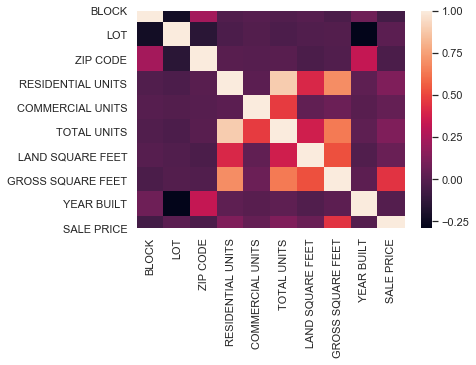

In [18]:
#Correlation between the features
corr = data.corr()
sns.heatmap(corr)

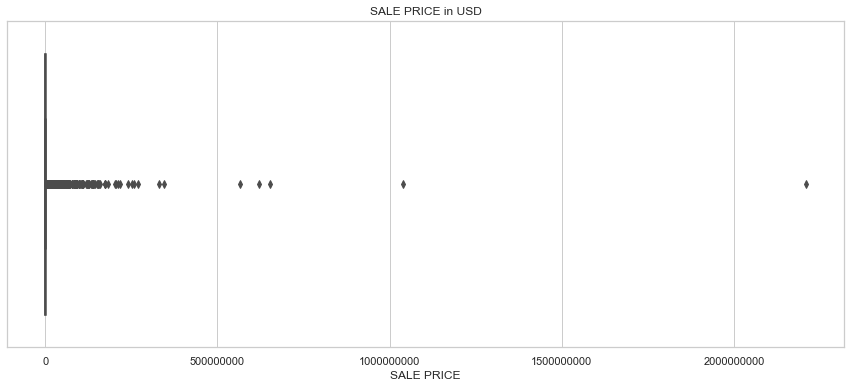

In [19]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('SALE PRICE in USD')
plt.show()

In [20]:
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
GROSS SQUARE FEET    0.449913
TOTAL UNITS          0.126654
RESIDENTIAL UNITS    0.122566
LAND SQUARE FEET     0.060143
COMMERCIAL UNITS     0.044535
LOT                  0.012266
YEAR BUILT          -0.003779
ZIP CODE            -0.034110
BLOCK               -0.061357
Name: SALE PRICE, dtype: float64

In [21]:
numeric_data=data.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,83190.000000,83190.00000,83190.00000,83190.000000,83190.000000,83190.000000,8.319000e+04,8.319000e+04,83190.000000,6.928100e+04
mean,4241.989314,376.47900,10732.19780,1.998509,0.183688,2.211624,3.858418e+03,3.891878e+03,1790.526854,1.286521e+06
std,3567.925112,658.41729,1290.28681,16.621786,8.606908,18.838995,3.460117e+04,2.866838e+04,535.529082,1.145690e+07
min,1.000000,1.00000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1326.000000,22.00000,10305.00000,0.000000,0.000000,1.000000,2.000000e+03,1.344000e+03,1920.000000,2.350000e+05
50%,3317.000000,50.00000,11209.00000,1.000000,0.000000,1.000000,3.200000e+03,2.516000e+03,1940.000000,5.350000e+05
75%,6290.000000,1001.00000,11357.00000,2.000000,0.000000,2.000000,3.858418e+03,3.891878e+03,1965.000000,9.500000e+05
max,16322.000000,9106.00000,11694.00000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


In [22]:
#Removing observations
data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 5000000)]

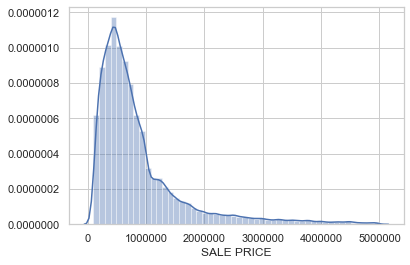

In [23]:
sns.distplot(data['SALE PRICE'])

In [24]:
#skewness of SalePrice
data['SALE PRICE'].skew()

2.3437455096169386

0.19896303705046872


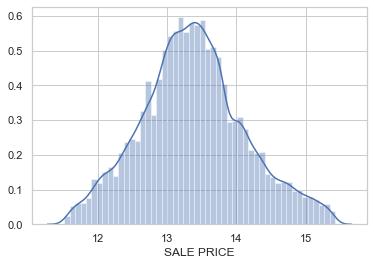

In [25]:
#Applying log transform to skew
sales=np.log(data['SALE PRICE'])
print(sales.skew())
sns.distplot(sales)

In [26]:
data = data[data['GROSS SQUARE FEET'] < 10000]
data = data[data['LAND SQUARE FEET'] < 10000]

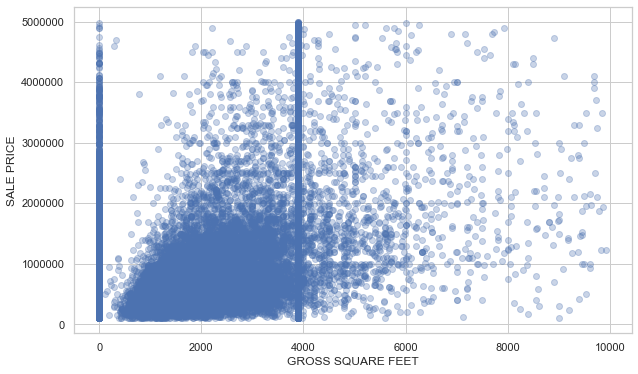

In [27]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

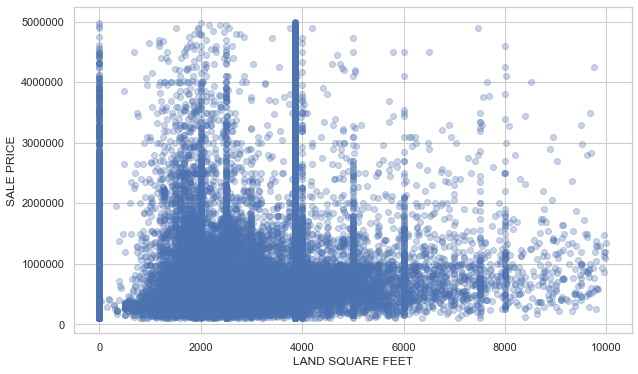

In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})

In [29]:
# BUILDING CLASS CATEGORY
print(data['BUILDING CLASS CATEGORY'].nunique())

pivot=data.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot

41


,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,510000.0
02 TWO FAMILY DWELLINGS,664151.0
03 THREE FAMILY DWELLINGS,820000.0
04 TAX CLASS 1 CONDOS,425880.0
05 TAX CLASS 1 VACANT LAND,400000.0
06 TAX CLASS 1 - OTHER,464500.0
07 RENTALS - WALKUP APARTMENTS,1280000.0
08 RENTALS - ELEVATOR APARTMENTS,3670000.0
09 COOPS - WALKUP APARTMENTS,300000.0


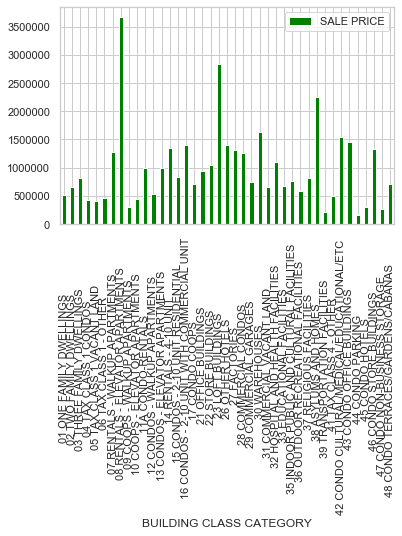

In [30]:
pivot.plot(kind='bar', color='Green')

In [31]:
#remove few columns
del data['ADDRESS']
del data['APARTMENT NUMBER']

In [32]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE'],
      dtype='object')

In [33]:
#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = data[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

In [34]:
scaler = StandardScaler()
scaler.fit(data[numeric_data.columns])
scaled = scaler.transform(data[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       data[col] = scaled[:,i]

In [35]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.530568,-0.637372,C4,-0.637703,3.745463,-0.168313,3.669999,-0.364481,2.864069,0.191227,2,C4,2.429775
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,-1.522439,-0.430632,C4,-0.637703,3.324391,-0.168313,3.252398,-0.695347,1.175847,0.205486,2,C4,2.150093
13,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,-1.592032,-0.319953,C6,-0.637703,-1.286100,-0.168313,-1.320087,0.641061,0.956193,0.205486,2,C6,-0.329833
15,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,-1.592032,-0.319953,C6,-0.637703,-1.286100,-0.168313,-1.320087,0.641061,0.956193,0.205486,2,C6,-0.250565
16,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,-1.592032,-0.319953,C6,-0.637703,-1.286100,-0.168313,-1.320087,0.641061,0.956193,0.205486,2,C6,-0.550605


In [36]:
#Removing some more columns
del data['BUILDING CLASS AT PRESENT']
del data['BUILDING CLASS AT TIME OF SALE']
del data['NEIGHBORHOOD']

In [37]:
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']

In [38]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(data[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53832 entries, 3 to 84545
Data columns (total 61 columns):
BOROUGH_1                                                               53832 non-null uint8
BOROUGH_2                                                               53832 non-null uint8
BOROUGH_3                                                               53832 non-null uint8
BOROUGH_4                                                               53832 non-null uint8
BOROUGH_5                                                               53832 non-null uint8
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                         53832 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                         53832 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                       53832 non-null uint8
BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS                           53832 non-null uint8
BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND    

In [39]:
# Replacing categorical columns with dummies
fdf = data.drop(one_hot_features,axis=1)
fdf = pd.concat([fdf, one_hot_encoded] ,axis=1)

In [40]:
#Train/Test Split
Y_fdf = fdf['SALE PRICE']
X_fdf = fdf.drop('SALE PRICE', axis=1)

X_fdf.shape , Y_fdf.shape

((53832, 70), (53832,))

In [41]:
X_train ,X_test, Y_train , Y_test = train_test_split(X_fdf , Y_fdf , test_size = 0.3 , random_state =34)

In [42]:
# Training set
X_train.shape , Y_train.shape

((37682, 70), (37682,))

In [43]:
#Testing set
X_test.shape , Y_test.shape

((16150, 70), (16150,))

In [44]:
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [45]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred_lin = linreg.predict(X_test)
rmse(Y_test,Y_pred_lin)

0.7170986303661702

In [46]:
#Linear Regression classifier to check accuracy
reg = LinearRegression()
reg.fit(X_train , Y_train)
reg.score(X_test, Y_test)

0.4831284246163353

In [47]:
#Gradient Boosting Regressor classifier to check accuracy
clf = ensemble.GradientBoostingRegressor(n_estimators=1000, max_depth=15, min_samples_split=2, learning_rate=0.1, loss='huber')
clf.fit(X_train , Y_train)
clf.score(X_test, Y_test)

0.6554108418440818

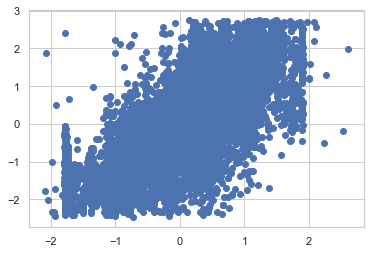

In [49]:
#Ploting relation beetween test output and Linear Regression model output
plt.scatter(reg.predict(X_test), Y_test)
plt.show()

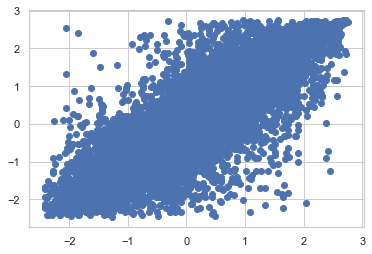

In [51]:
#Ploting relation beetween test output and Gradient Boosting Regressor model output
plt.scatter(clf.predict(X_test), Y_test)
plt.show()

In [53]:
#Verify the mean absolute percentage error for comparison
mean_absolute_error(Y_test, reg.predict(X_test)) #MAPE of Linear Regression

0.55171865290498

In [54]:
mean_absolute_error(Y_test, clf.predict(X_test))#MAPE of Gradient Boosting Regressor

0.4056941138476812